<a href="https://colab.research.google.com/github/bilgrami/gen-ai-smart-support-agent/blob/main/01_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab notebook for testing different word embeddings using Gensim

https://nlp.stanford.edu/projects/glove/

## Transformer Algorithm and Architecture

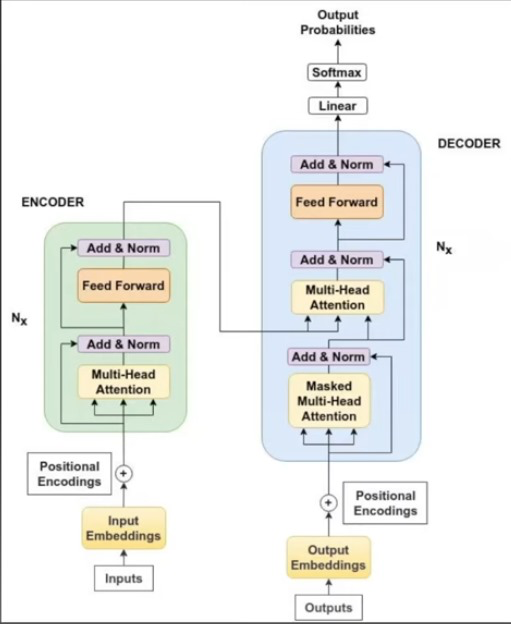

In [3]:
# First, install the necessary libraries
!pip install gensim

In [12]:
# Import the gensim library
import gensim.downloader
model_data = {}
# Function to load and test word embeddings

def get_model(model_name):
    print(f"model name: {model_name}")
    if not model_name in model_data.keys():
        model = gensim.downloader.load(model_name)
        model_data[model_name] = model

    return model_data[model_name]


def test_word_embeddings(model, word):
    embedding = model[word]
    return embedding

# Function to find the most similar words to a given embedding
def get_similar_words(model, embedding, word, topn = 10):
    similar_words = model.similar_by_vector(embedding, topn=topn)
    print(f"Most similar words to the given embedding for the word {word} using model '{model_name}':")
    for word, similarity in similar_words:
        print(f"{word}: {similarity}")

# List of different word embedding models to test
# models = [
#     "glove-wiki-gigaword-50",
#     "glove-wiki-gigaword-100",
#     "glove-wiki-gigaword-200",
#     "glove-wiki-gigaword-300",
#     "word2vec-google-news-300",
#     "fasttext-wiki-news-subwords-300"
# ]

models = [
    "glove-wiki-gigaword-300",
    "word2vec-google-news-300"
]

# Load each model
for model_name in models:
  model = get_model(model_name)


In [15]:
# Word to test
words_to_test = ["tower", "king", "queen", "boy", "girl"]

# Testing each model
for word_to_test in words_to_test:
  print(f" ----- word_to_test: {word_to_test} ----- ")
  try:
      for model_name in models:
        model = get_model(model_name)
        embedding = test_word_embeddings(model, word_to_test)
        get_similar_words(model, embedding, word_to_test, 5)
  except KeyError:
    print(f"The word '{word_to_test}' is not in the vocabulary of the model '{model_name}'")


 ----- word_to_test: tower ----- 
model name: glove-wiki-gigaword-300
Most similar words to the given embedding for the word tower using model 'glove-wiki-gigaword-300':
tower: 1.0000001192092896
towers: 0.7919201850891113
skyscraper: 0.6111851930618286
building: 0.5957719683647156
spire: 0.5896912217140198
model name: word2vec-google-news-300
Most similar words to the given embedding for the word tower using model 'word2vec-google-news-300':
tower: 0.9999999403953552
towers: 0.8531750440597534
skyscraper: 0.6417425870895386
Tower: 0.639177143573761
spire: 0.594687819480896
 ----- word_to_test: king ----- 
model name: glove-wiki-gigaword-300
Most similar words to the given embedding for the word king using model 'glove-wiki-gigaword-300':
king: 1.0000001192092896
queen: 0.6336469054222107
prince: 0.6196624040603638
monarch: 0.5899620056152344
kingdom: 0.5791266560554504
model name: word2vec-google-news-300
Most similar words to the given embedding for the word king using model 'word2ve